# Car Service Data Analysis

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data from csv file

df = pd.read_csv("../DATA/car_service_data.csv",index_col="Service ID")
df.head()

,Service Type,Service Cost,Service Revenue,Number of Customers,Advertising Cost,Location
Service ID,,,,,,
1,Oil Change,$25,$50,10,$100,Urban
2,Brake Repair,$200,$500,5,$50,Suburban
3,Tire Rotation,$30,$75,12,$150,Rural
4,Transmission Repair,$1000,$2500,2,$200,Urban
5,Battery Replacement,$150,$300,8,$75,Suburban


In [3]:
# Column names
df.columns

Index(['Service Type', 'Service Cost', 'Service Revenue',
       'Number of Customers', 'Advertising Cost', 'Location'],
      dtype='object')

In [4]:
# Data type of dataframe
df.dtypes

Service Type           object
Service Cost           object
Service Revenue        object
Number of Customers     int64
Advertising Cost       object
Location               object
dtype: object

In [5]:
# Convert columns to int dtypes

# Function to convert
def modify_dt(df):
    df['Service Cost'] = df['Service Cost'].str.replace('$','').astype(int)
    df['Service Revenue'] = df['Service Revenue'].str.replace('$','').astype(int)
    df['Advertising Cost'] = df['Advertising Cost'].str.replace('$','').astype(int)
    return(df)

In [6]:
df_copy = df.copy()

modify_dt(df_copy)
df_copy.head()

,Service Type,Service Cost,Service Revenue,Number of Customers,Advertising Cost,Location
Service ID,,,,,,
1,Oil Change,25,50,10,100,Urban
2,Brake Repair,200,500,5,50,Suburban
3,Tire Rotation,30,75,12,150,Rural
4,Transmission Repair,1000,2500,2,200,Urban
5,Battery Replacement,150,300,8,75,Suburban


In [7]:
# Group by Location and sort by Service cost

by_location = df_copy.groupby(by='Location').sum(numeric_only=True)
by_location.sort_values(by='Service Cost',ascending=False,inplace=True)

In [8]:
# Location with highest service cost
loc_highest_cost = by_location['Service Cost'].idxmax()

print(f"The location with highest service cost is {loc_highest_cost}")

The location with highest service cost is Urban


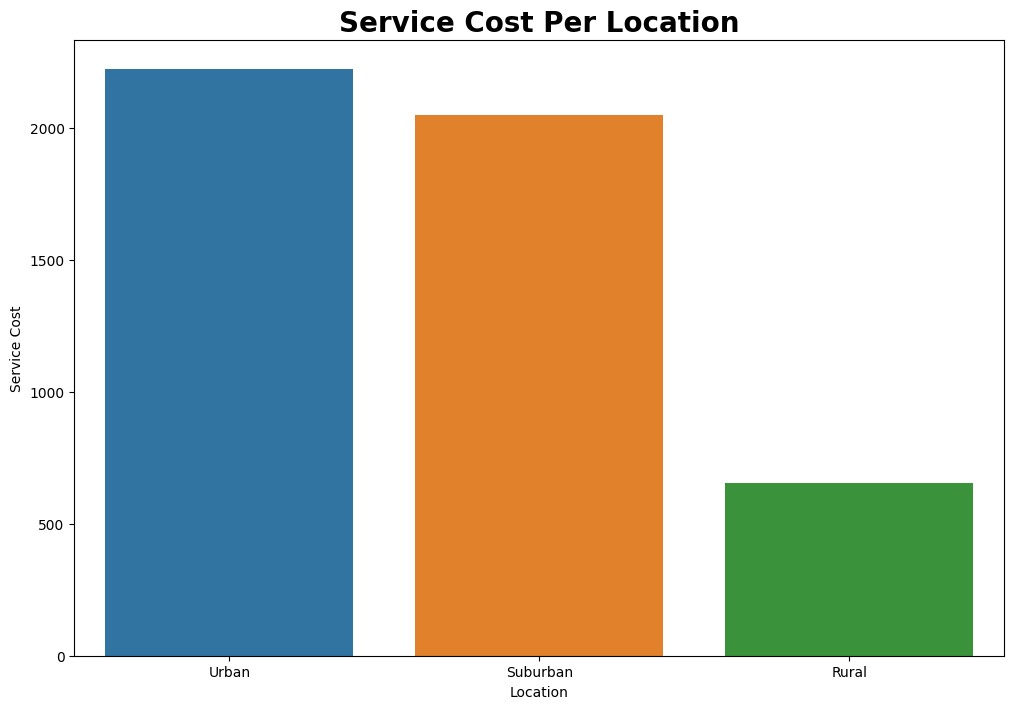

In [9]:
# Barplot of service cost

fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(data=by_location,x=by_location.index,
            y=by_location['Service Cost'],
            hue=by_location.index, ax=ax
            )
plt.title(label="Service Cost Per Location",
          fontdict={"fontsize":20, "fontweight":"bold"}
          )
plt.show()

In [10]:
# Location with highest number of customers
by_location.sort_values(by="Number of Customers",ascending=False,inplace=True)

loc_highest_customers = by_location['Number of Customers'].idxmax()

print(f"The location with highest number of customers is {loc_highest_customers}")

The location with highest number of customers is Rural


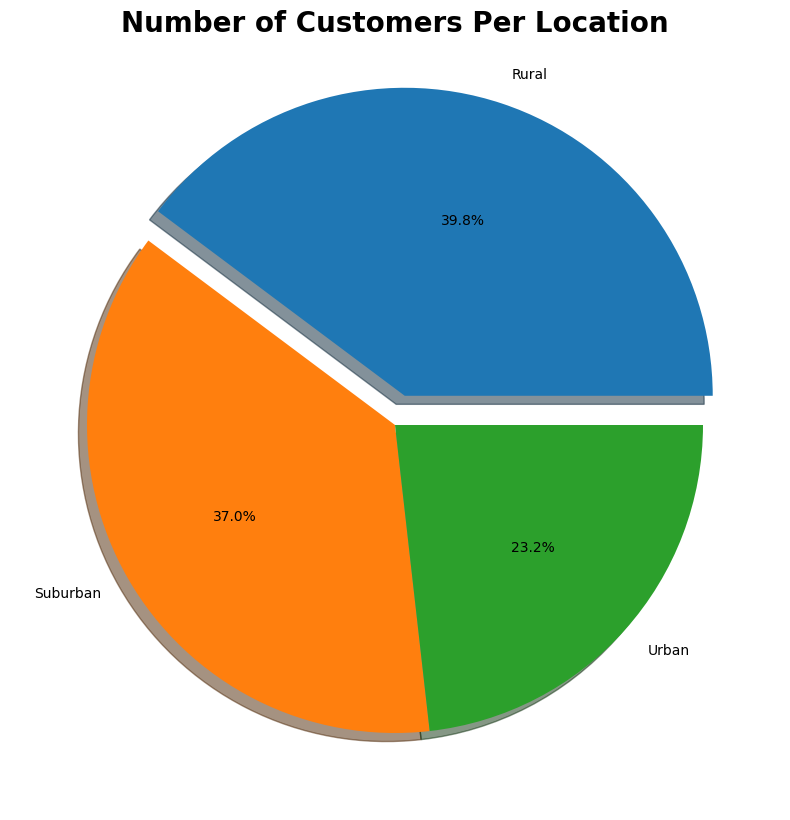

In [11]:
# Pie chart of number of customers per location

fig,ax = plt.subplots(figsize=(12,10))
ax.pie(data=by_location, x='Number of Customers',
       labels=by_location.index,explode=(0.1,0,0),
       autopct='%1.1f%%',shadow=True
       )
plt.title(label="Number of Customers Per Location",
          fontdict={"fontsize":20, "fontweight":"bold"})
plt.show()

In [12]:
# Compute profit
df_copy['Profit'] = df_copy['Service Revenue'] - df_copy['Service Cost']

# Compute profit margins
df_copy['Profit Margin'] = (df_copy['Profit']/df_copy['Service Revenue']) * 100

# Group data by location
df_copy.groupby(by='Location')['Profit Margin'].mean().map('{:,.1f}%'.format)

Location
Rural       60.4%
Suburban    55.8%
Urban       56.5%
Name: Profit Margin, dtype: object

In [13]:
# Group data by location
grouped_location = df_copy.groupby(by='Location')[['Advertising Cost','Service Revenue']].sum()

# Compute advertising cost as a percentage of service revenue
((grouped_location['Advertising Cost'] / grouped_location['Service Revenue']) * 100).map('{:,.1f}%'.format)

Location
Rural       34.8%
Suburban    12.6%
Urban       14.0%
dtype: object

In [14]:
# Rank group by location
grouped_location['Rank'] = (grouped_location['Advertising Cost'] / grouped_location['Service Revenue']).rank(ascending=False)
grouped_location

,Advertising Cost,Service Revenue,Rank
Location,,,
Rural,575,1650,1.0
Suburban,625,4950,3.0
Urban,750,5350,2.0
